In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(font_scale=2)
from datetime import date,timedelta


In [2]:
crimes = pd.read_csv('sanfrancisco_incidents_summer_2014.csv',parse_dates=['Date'],
                    infer_datetime_format=True)
crimes

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,2014-08-31,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,2014-08-31,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,2014-08-31,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244
3,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,2014-08-31,23:30,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485263,37.772518,"(37.7725176473142, -122.485262988324)",14617753106244
4,140734220,NON-CRIMINAL,FOUND PROPERTY,Sunday,2014-08-31,23:23,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.509895,37.772313,"(37.7723131976814, -122.509895418239)",14073422072000
5,140734349,DRUG/NARCOTIC,POSSESSION OF MARIJUANA,Sunday,2014-08-31,23:13,SOUTHERN,"ARREST, BOOKED",11TH ST / MINNA ST,-122.416578,37.773907,"(37.773907074489, -122.416578493475)",14073434916010
6,140734349,DRUG/NARCOTIC,POSSESSION OF CONTROLLED SUBSTANCE FOR SALE,Sunday,2014-08-31,23:13,SOUTHERN,"ARREST, BOOKED",11TH ST / MINNA ST,-122.416578,37.773907,"(37.773907074489, -122.416578493475)",14073434916662
7,140734349,DRIVING UNDER THE INFLUENCE,DRIVING WHILE UNDER THE INFLUENCE OF ALCOHOL,Sunday,2014-08-31,23:13,SOUTHERN,"ARREST, BOOKED",11TH ST / MINNA ST,-122.416578,37.773907,"(37.773907074489, -122.416578493475)",14073434965050
8,140738147,OTHER OFFENSES,EVADING A POLICE OFFICER RECKLESSLY,Sunday,2014-08-31,23:00,INGLESIDE,NONE,1400 Block of DOLORES ST,-122.424498,37.746649,"(37.7466488718366, -122.424497944857)",14073814727175
9,140734258,TRESPASS,TRESPASSING,Sunday,2014-08-31,23:00,CENTRAL,"ARREST, CITED",900 Block of MASON ST,-122.410846,37.792316,"(37.7923158747647, -122.410845624227)",14073425827195


In [3]:
hour_of_crimes = np.zeros(len(crimes))

crimes_time = pd.DatetimeIndex(crimes.Time)


for i in range (len(crimes)):
    hour_of_crimes[i] = crimes_time.hour[i]
    
crimes['Hour'] = hour_of_crimes

crimes['Month'] = pd.DatetimeIndex(crimes['Date']).month

In [4]:
hourly = crimes.pivot_table('IncidntNum', aggfunc='count',
                           index=['Hour'], columns=['Category'])

hourly

Category,ARSON,ASSAULT,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,EXTORTION,...,RUNAWAY,SECONDARY CODES,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
Hour,,,,,,,,,,,,,,,,,,,,,
0.0,5.0,169.0,NaN,NaN,3.0,9.0,56.0,9.0,NaN,NaN,...,4.0,30.0,NaN,1.0,74.0,8.0,1.0,66.0,62.0,26.0
1.0,2.0,115.0,1.0,1.0,2.0,17.0,30.0,11.0,NaN,1.0,...,2.0,7.0,3.0,1.0,32.0,7.0,NaN,51.0,49.0,12.0
2.0,1.0,126.0,NaN,NaN,1.0,8.0,31.0,10.0,NaN,1.0,...,2.0,10.0,NaN,2.0,26.0,12.0,NaN,36.0,36.0,8.0
3.0,5.0,68.0,NaN,2.0,1.0,5.0,24.0,6.0,NaN,NaN,...,1.0,14.0,NaN,NaN,17.0,9.0,1.0,24.0,23.0,10.0
4.0,4.0,39.0,NaN,NaN,NaN,3.0,3.0,2.0,NaN,NaN,...,1.0,5.0,NaN,NaN,13.0,5.0,1.0,19.0,17.0,6.0
5.0,3.0,52.0,NaN,NaN,NaN,1.0,8.0,1.0,NaN,1.0,...,NaN,5.0,NaN,NaN,11.0,5.0,1.0,19.0,21.0,2.0
6.0,2.0,47.0,NaN,NaN,1.0,2.0,9.0,NaN,NaN,NaN,...,1.0,10.0,NaN,NaN,17.0,6.0,1.0,33.0,32.0,4.0
7.0,NaN,70.0,NaN,NaN,NaN,1.0,25.0,4.0,NaN,NaN,...,1.0,5.0,NaN,3.0,31.0,12.0,NaN,33.0,49.0,6.0
8.0,5.0,90.0,NaN,1.0,1.0,NaN,27.0,2.0,NaN,NaN,...,3.0,14.0,1.0,1.0,41.0,16.0,NaN,71.0,56.0,10.0


### Top Ten Crimes by Hour

In [5]:
top_crimes = pd.DataFrame()
medium_crimes = pd.DataFrame()
low_crimes = pd.DataFrame()

for category in crimes['Category'].unique():
    if crimes[crimes['Category']==category]['IncidntNum'].count() > 400:
        top_crimes = top_crimes.append(crimes[crimes['Category']==category])
    elif crimes[crimes['Category']==category]['IncidntNum'].count() > 100:
        medium_crimes = medium_crimes.append(crimes[crimes['Category']==category])
    else:
        low_crimes = low_crimes.append(crimes[crimes['Category']==category])
    
top_hourly = top_crimes.pivot_table('IncidntNum', aggfunc='count',
                           index=['Hour'], columns=['Category'])

medium_hourly = medium_crimes.pivot_table('IncidntNum', aggfunc='count',
                           index=['Hour'], columns=['Category'])

low_hourly = low_crimes.pivot_table('IncidntNum', aggfunc='count',
                           index=['Hour'], columns=['Category'])

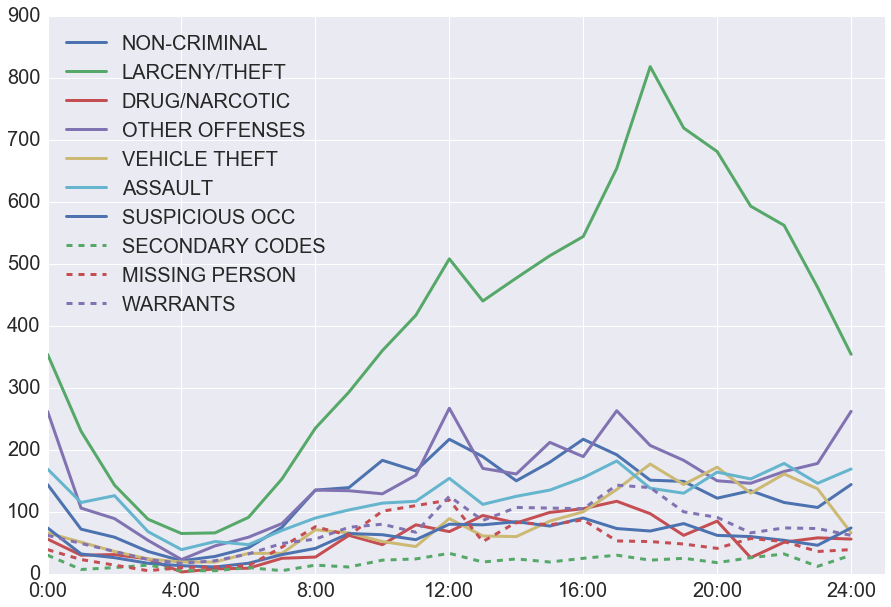

In [24]:
categories = top_crimes.Category.unique()
count = 0

fig = plt.figure(figsize=(15,10))
fmt = plt.FuncFormatter(lambda x, *args: '{0}:00'.format(int(x)))
ax = plt.axes()

for category in categories:
    vals = top_hourly[category].values
    vals = np.hstack([vals, vals[:1]])
    if (count < 7):
        plt.plot(range(25), vals,'-',lw=3,label=category)
    else:
        plt.plot(range(25),vals, '--',lw=3,label=category)

    count += 1

ax.xaxis.set_major_locator(plt.MultipleLocator(4))
ax.xaxis.set_major_formatter(fmt)
ax.set_xmlim=(0,24)
plt.legend(loc='upper left')

fig.savefig('figs/top_ten_crimes_by_hour.png', bbox_inches='tight')



## Top Crimes by Day of Week

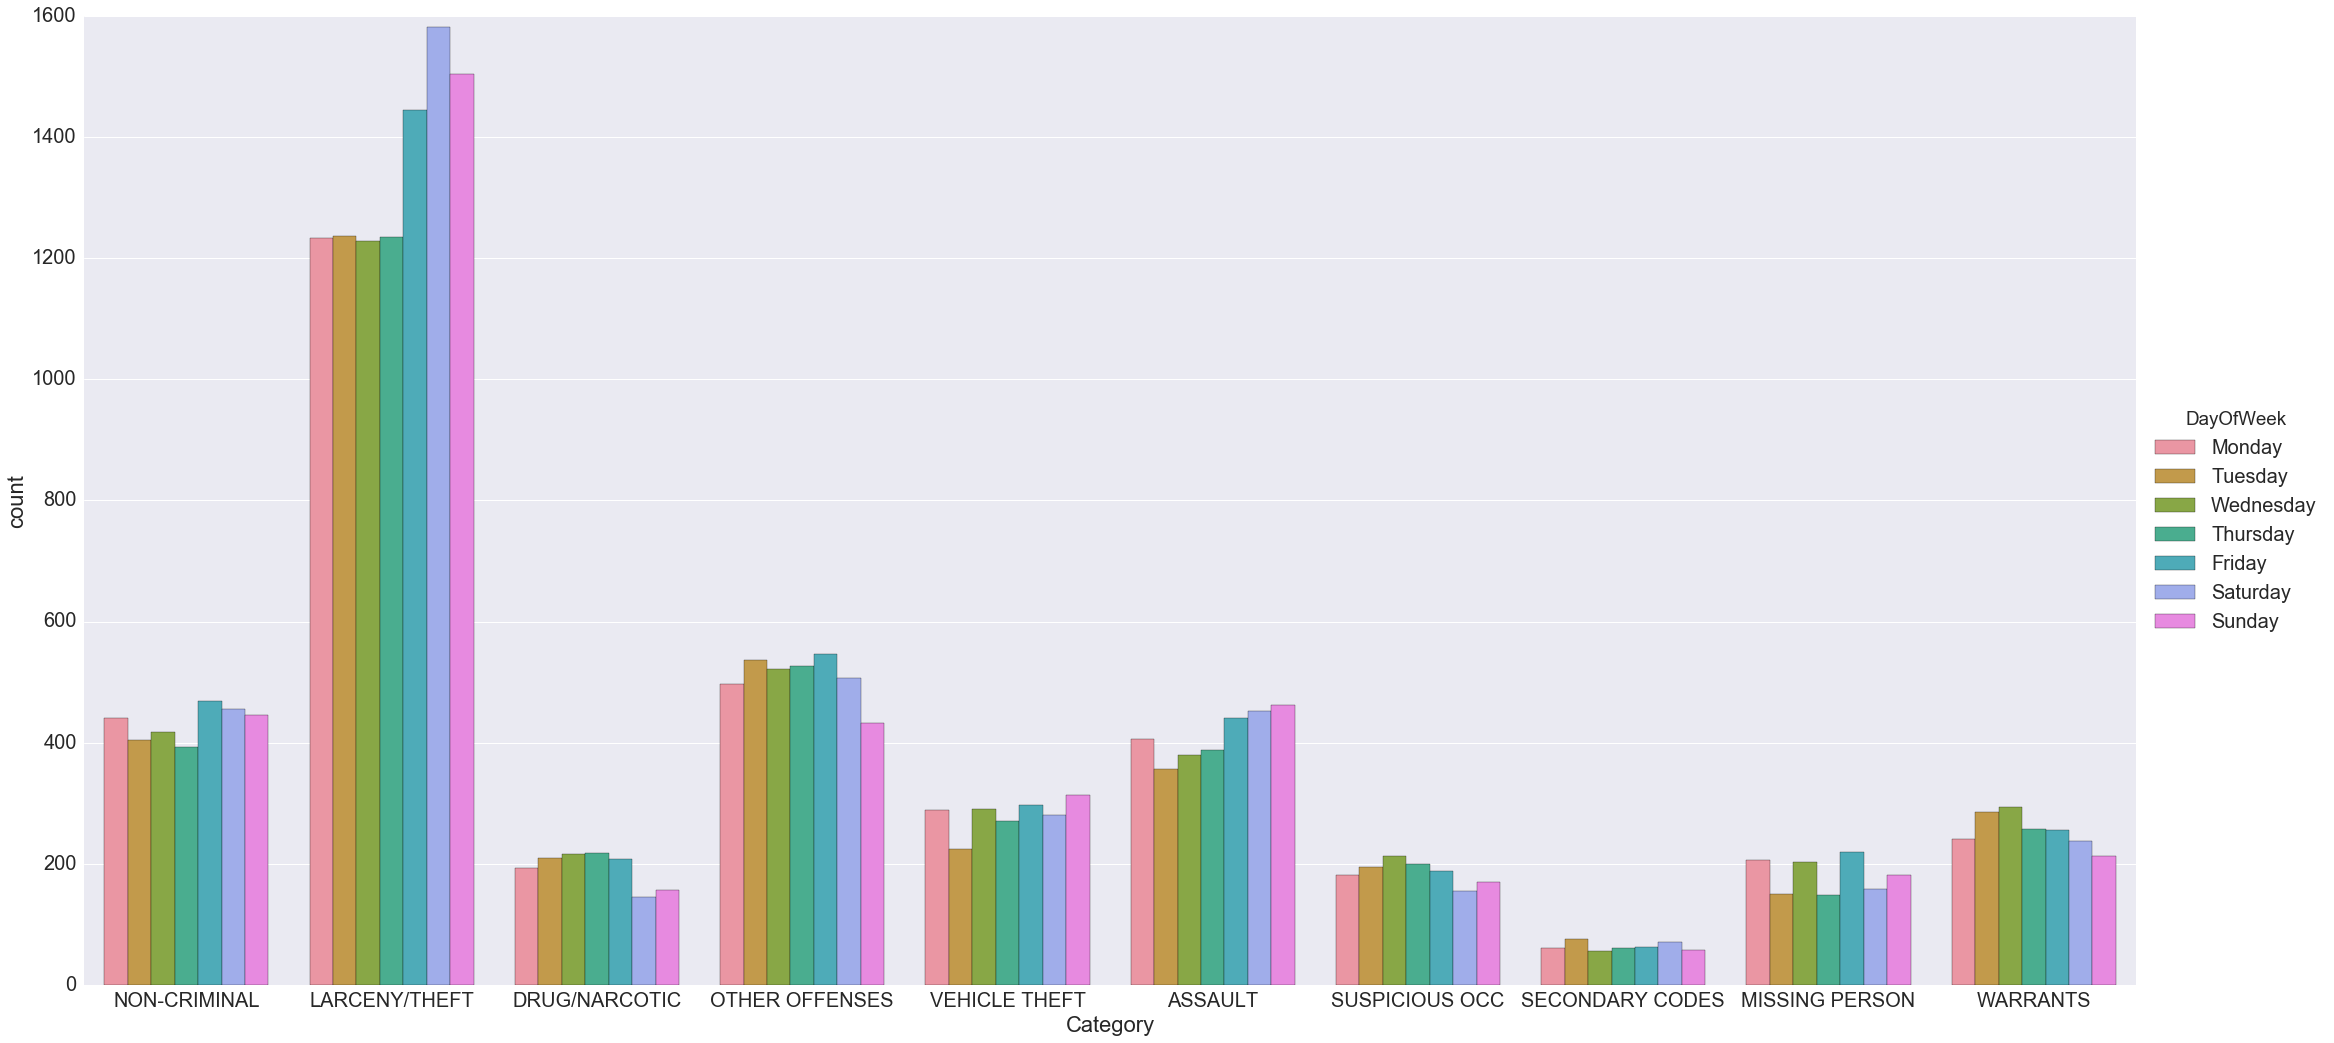

In [25]:
g = sns.factorplot(hue="DayOfWeek",hue_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],x="Category",data=top_crimes,size=15, aspect = 2,kind="count")

g.savefig('figs/top_ten_by_dow.png', bbox_inches='tight')



### Theft & Assault: Weekdays vs Weekends

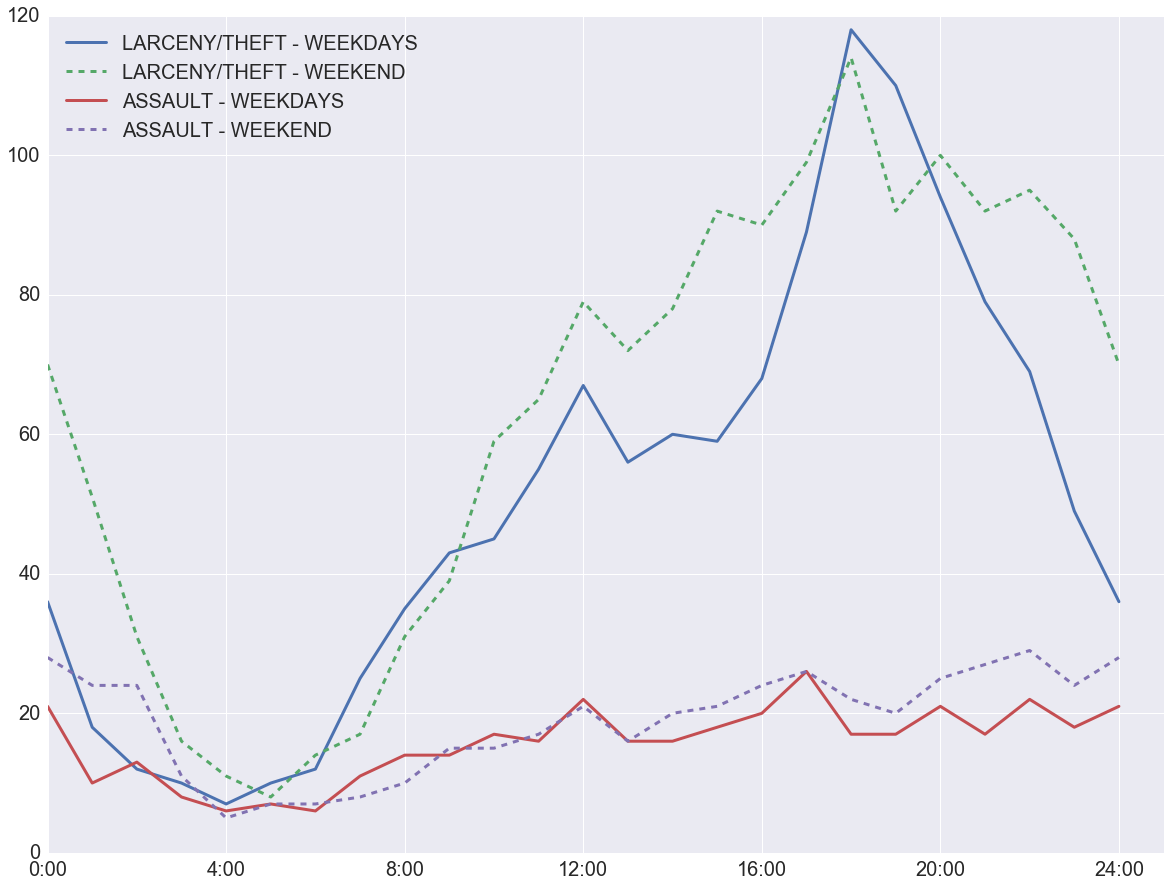

In [9]:
#weekday_top_crimes = top_crimes[top_crimes.isin({'DayOfWeek':['Monday','Tuesday','Wednesday','Thursday','Friday']})]
weekday_top_crimes = pd.DataFrame()

#should be more elegant way to do this but I couldn't figure it out...
weekday_top_crimes = weekday_top_crimes.append(top_crimes[top_crimes['DayOfWeek'] == 'Monday'])
weekday_top_crimes = weekday_top_crimes.append(top_crimes[top_crimes['DayOfWeek'] == 'Tuesday'])
weekday_top_crimes = weekday_top_crimes.append(top_crimes[top_crimes['DayOfWeek'] == 'Wednesday'])
weekday_top_crimes = weekday_top_crimes.append(top_crimes[top_crimes['DayOfWeek'] == 'Thursday'])

weekday_top_hourly = weekday_top_crimes.pivot_table('IncidntNum', aggfunc='count',
                           index=['Hour'], columns=['Category'])

#weekend_top_crimes = top_crimes[top_crimes.isin({'DayOfWeek':['Saturday','Sunday']}).all()]
#weekend_crimes = crimes[crimes['DayofWeek']=='Saturday' or crimes['DayOfWeek']=='Sunday']]
#weekday_top_crimes = top_crimes[top_crimes.isin({'DayOfWeek':['Monday','Tuesday','Wednesday','Thursday','Friday']})]
weekend_top_crimes = pd.DataFrame()

weekend_top_crimes = weekend_top_crimes.append(top_crimes[top_crimes['DayOfWeek'] == 'Friday'])
weekend_top_crimes = weekend_top_crimes.append(top_crimes[top_crimes['DayOfWeek'] == 'Saturday'])
weekend_top_crimes = weekend_top_crimes.append(top_crimes[top_crimes['DayOfWeek'] == 'Sunday'])

weekend_top_hourly = weekend_top_crimes.pivot_table('IncidntNum', aggfunc='count',
                           index=['Hour'], columns=['Category'])


fig = plt.figure(figsize=(20,15))
fmt = plt.FuncFormatter(lambda x, *args: '{0}:00'.format(int(x)))
ax = plt.axes()

for category in ['LARCENY/THEFT','ASSAULT']:
    vals = weekday_top_hourly[category].values/4
    vals = np.hstack([vals, vals[:1]])
    plt.plot(range(25), vals,'-',lw=3,label=str(category + ' - WEEKDAYS'))

    vals = weekend_top_hourly[category].values/3
    vals = np.hstack([vals, vals[:1]])
    plt.plot(range(25),vals, '--',lw=3,label=str(category + ' - WEEKEND'))
   
    count += 1

ax.xaxis.set_major_locator(plt.MultipleLocator(4))
ax.xaxis.set_major_formatter(fmt)
ax.set_xmlim=(0,24)
plt.legend(loc='upper left')

fig.savefig('figs/TandA_week_vs_weekends_trend.png', bbox_inches='tight')



### Load temperature Data from NOAA

In [11]:
#temperature dataset scraped from NOAA Online Weather Data
temps = pd.read_csv('sf_temps_summer_2014.csv',
                    parse_dates=['Date'],
                    infer_datetime_format=True)

In [12]:
temps_vs_crime_totals = crimes.pivot_table('IncidntNum', aggfunc='count',
                           index=['Date'], columns=['Category'])

temps_vs_crime_totals['Total Crimes'] = temps_vs_crime_totals.sum(axis=1)
temps_vs_crime_totals['Max Temp'] = np.zeros(len(temps_vs_crime_totals))
temps_vs_crime_totals['Ave Temp'] = np.zeros(len(temps_vs_crime_totals))

for summer_day in temps_vs_crime_totals.index:
    
    temps_vs_crime_totals['Max Temp'][summer_day] = temps[temps['Date']==summer_day]['Max Temp']
    temps_vs_crime_totals['Ave Temp'][summer_day] = temps[temps['Date']==summer_day]['Ave Temp']
  

### Average Temperature vs Theft

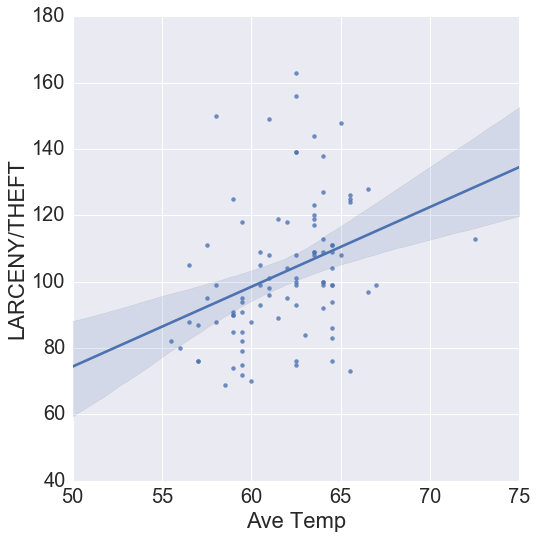

In [28]:
fig = sns.lmplot(x="Ave Temp",y='LARCENY/THEFT',size=8,data=temps_vs_crime_totals)
fig.savefig('figs/Ave_Temp_vs_THEFT.png', bbox_inches='tight')

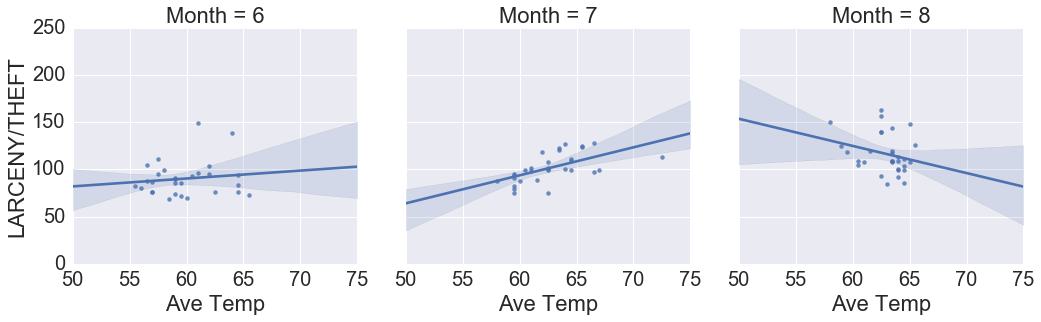

In [29]:
temps_vs_crime_totals['Month'] = temps_vs_crime_totals.index.month
fig = sns.lmplot(x="Ave Temp",y="LARCENY/THEFT",col="Month",data=temps_vs_crime_totals)
fig.savefig('figs/Ave_Temp_vs_THEFT_by_Month.png', bbox_inches='tight')

### Top Ten by Month

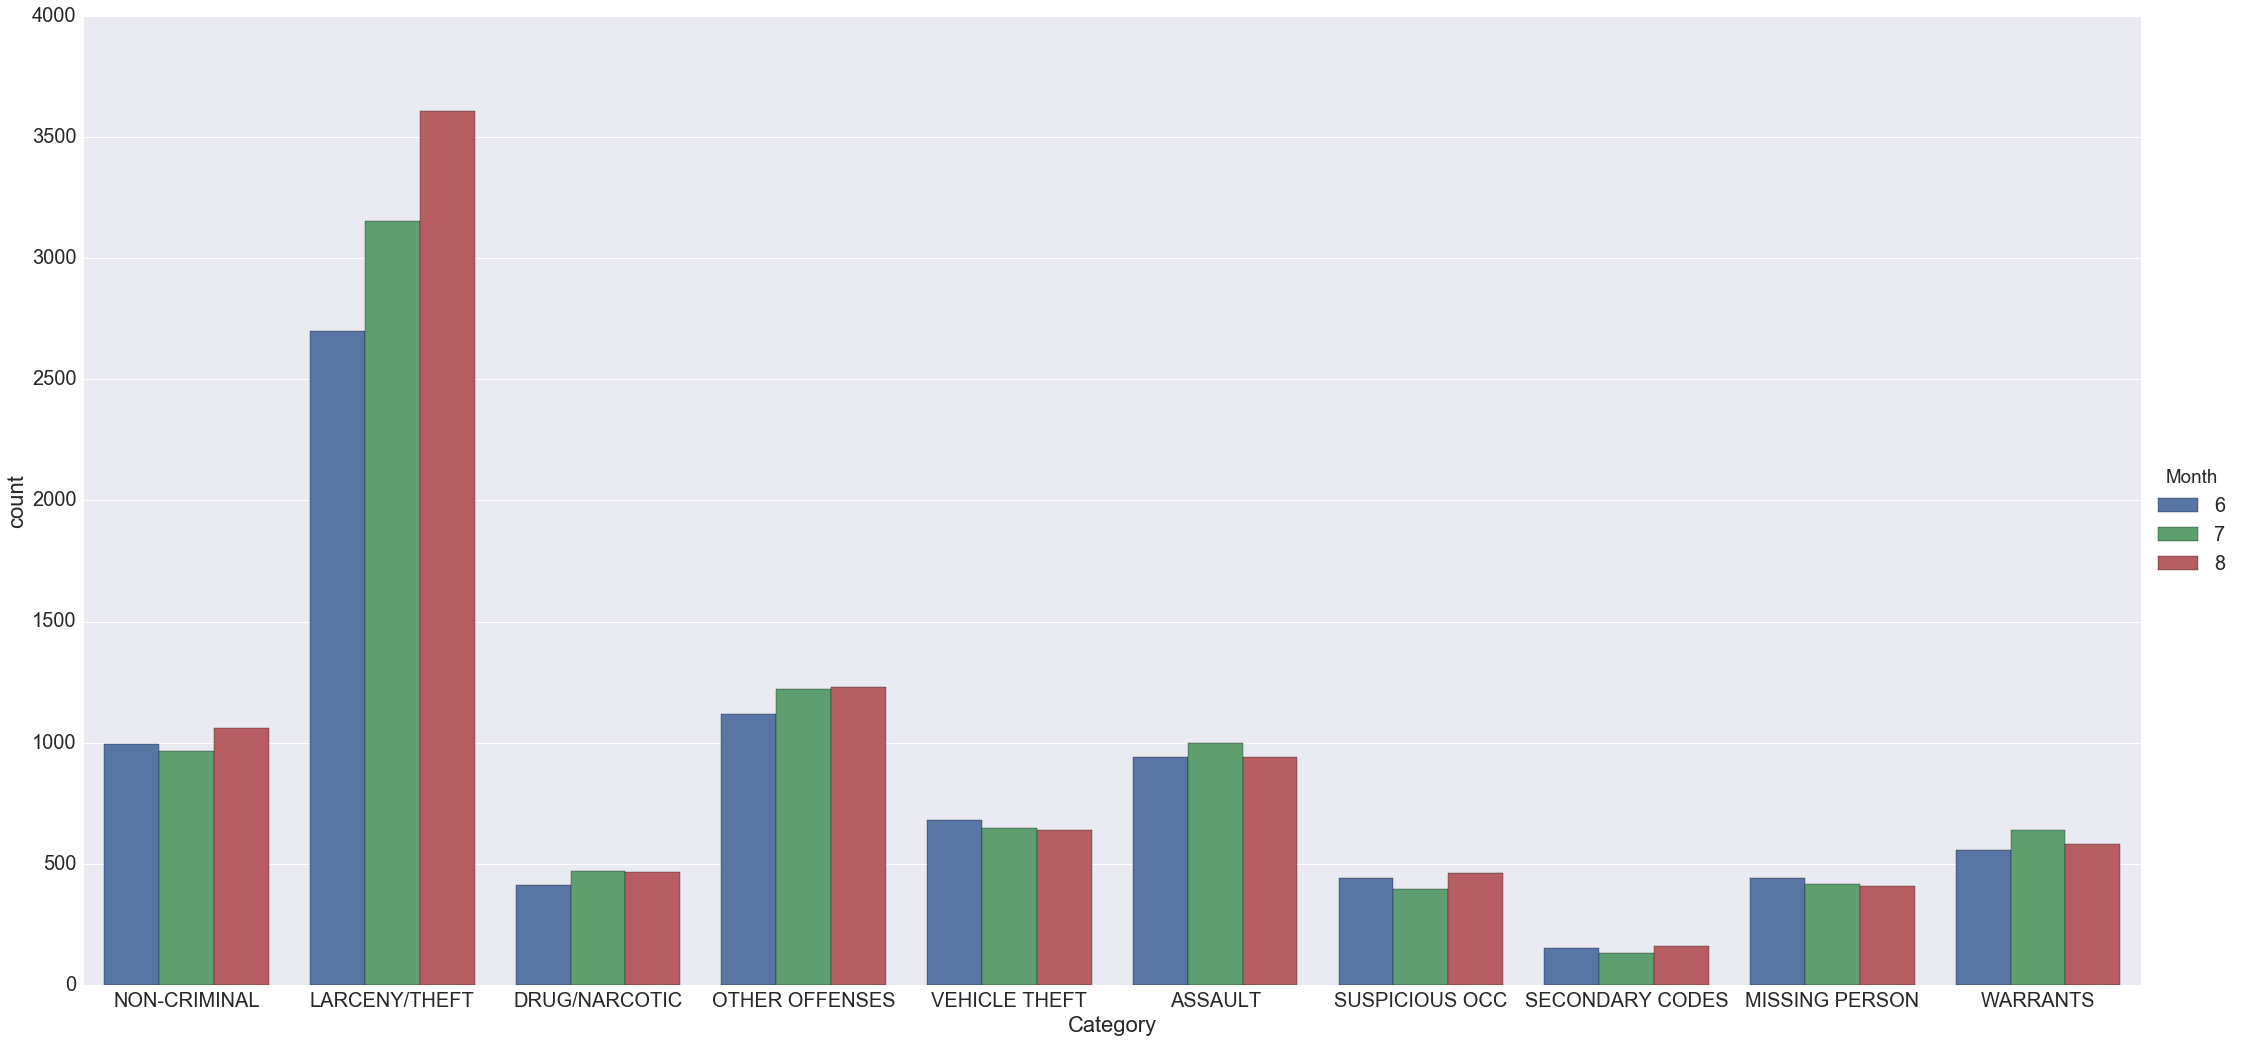

In [30]:
fig = sns.factorplot(hue="Month",x="Category",data=top_crimes,size=15, aspect = 2,kind="count")
fig.savefig('figs/top_ten_monthly_trend.png', bbox_inches='tight')